In [4]:
import pandas as pd
import numpy as np

In [2]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...,NaN,NaN,NaN
91,ham,Sorry to be a pain. Is it ok if we meet anothe...,NaN,NaN,NaN
1843,ham,Super da:)good replacement for murali,NaN,NaN,NaN
3427,ham,\Hi darlin did youPhone me? Im atHome if youwa...,NaN,NaN,NaN
3291,ham,Dear good morning how you feeling dear,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
# Dropping Unnecessary column
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [12]:
df.sample(5)

,v1,v2
176,ham,U still going to the mall?
1158,ham,Hey! There's veggie pizza... :/
765,spam,UR awarded a City Break and could WIN a å£200 ...
3944,ham,I will be gentle princess! We will make sweet ...
585,ham,Tell them u have a headache and just want to u...


In [13]:
# missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove the duplicates
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
# renaming the columns
df.rename(columns = {'v1' : 'Label', 'v2' : 'Message'}, inplace = True)
df.sample(5)

,Label,Message
5265,ham,Gud ni8.swt drms.take care
4166,ham,Are you at work right now ?
200,ham,I sent you &lt;#&gt; bucks
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
3405,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #Label is Target feature 

In [20]:
df['Label'] = encoder.fit_transform(df['Label'])

In [21]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA

In [22]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#Total No. of Spam & Ham 
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

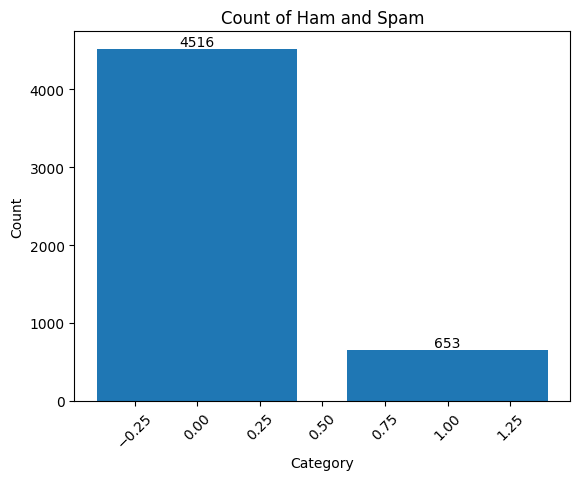

In [24]:
'''import matplotlib.pyplot as plt

value_counts = df['Label'].value_counts()

# Plotting a bar chart
plt.bar(['ham', 'spam'], value_counts)

# Adding labels and percentage values on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.5, f"{count}", ha='center')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Ham and Spam')
plt.show()
'''

import pandas as pd
import matplotlib.pyplot as plt
value_counts = df['Label'].value_counts()
plt.bar(value_counts.index, value_counts.values)
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.5, f"{count}", ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Ham and Spam')
plt.xticks(rotation=45)
plt.show()



In [25]:
import nltk

In [26]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\teams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\teams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['Message'].apply(len)

In [29]:
df.head()

,Label,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#Count the number of words in one message
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
#Count the number of sentence in one message
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,Label,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df.describe()

,Label,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [34]:
# ham messages
df[df['Label'] == 0].describe()

,Label,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [35]:
#spam messages
df[df['Label'] == 1].describe()

,Label,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

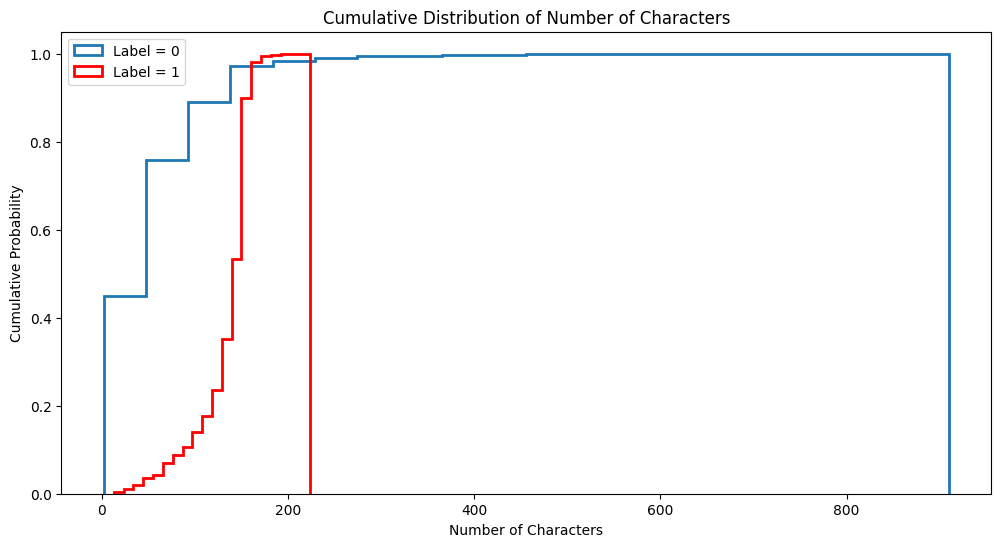

In [37]:
# Separate data based on 'target' values
target_0 = df[df['Label'] == 0]['num_characters']
target_1 = df[df['Label'] == 1]['num_characters']

# Create cumulative distribution plot (CDF)
plt.figure(figsize=(12, 6))
plt.hist(target_0, bins=20, density=True, cumulative=True, label='Label = 0', histtype='step', linewidth=2)
plt.hist(target_1, bins=20, density=True, cumulative=True, label='Label = 1', histtype='step', linewidth=2, color='red')

# Add labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Number of Characters')

plt.legend()
plt.show()


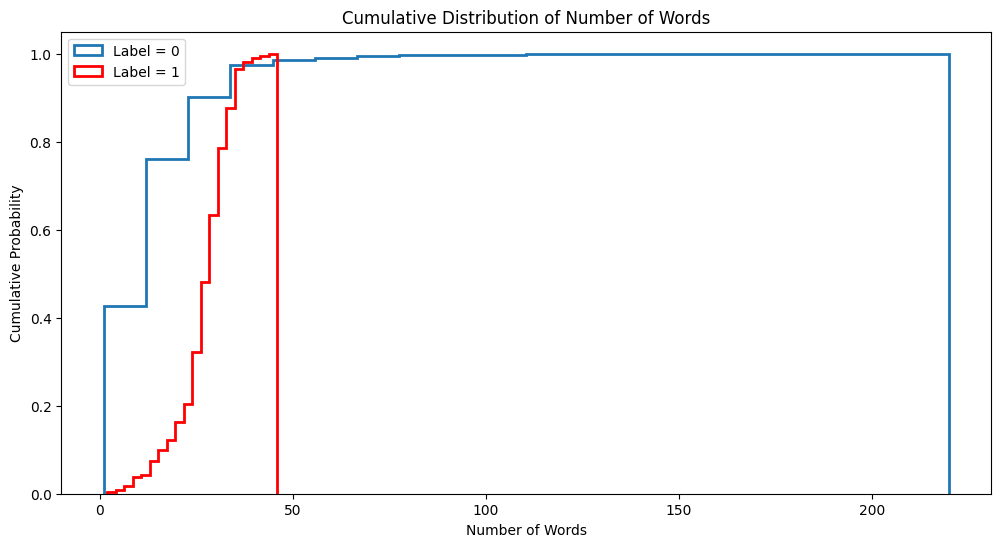

In [38]:
target_0 = df[df['Label'] == 0]['num_words']
target_1 = df[df['Label'] == 1]['num_words']

# Create cumulative distribution plot (CDF)
plt.figure(figsize=(12, 6))
plt.hist(target_0, bins=20, density=True, cumulative=True, label='Label = 0', histtype='step', linewidth=2)
plt.hist(target_1, bins=20, density=True, cumulative=True, label='Label = 1', histtype='step', linewidth=2, color='red')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Number of Words')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [39]:
numeric_columns = df.apply(pd.to_numeric, errors='coerce')
numeric_columns.dropna(inplace=True)  # Drop rows with NaN values after conversion

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Label  Message  num_characters  num_words  num_sentences
Label             NaN      NaN             NaN        NaN            NaN
Message           NaN      NaN             NaN        NaN            NaN
num_characters    NaN      NaN             NaN        NaN            NaN
num_words         NaN      NaN             NaN        NaN            NaN
num_sentences     NaN      NaN             NaN        NaN            NaN


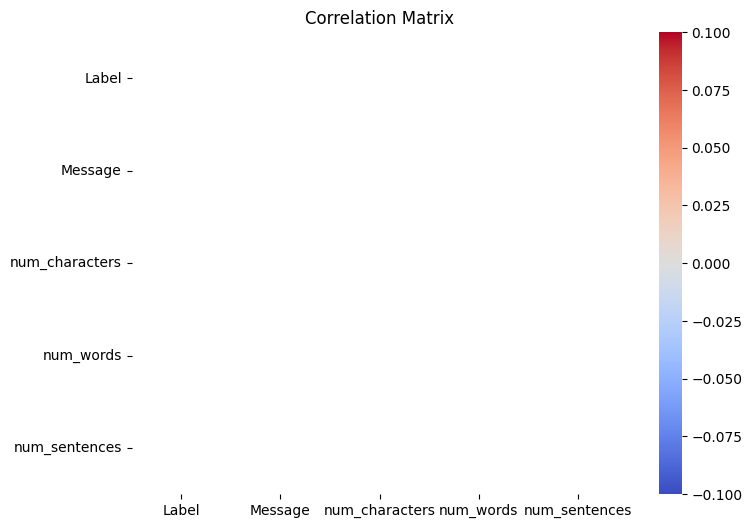

In [40]:
numeric_columns = df.apply(pd.to_numeric, errors='coerce')
numeric_columns.dropna(inplace=True)  # Drop rows with NaN values after conversion

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3. Data Preprocessing


In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
df['Transformed_Message'] = df['Message'].apply(transform_text)

In [47]:
df.head()

,Label,Message,num_characters,num_words,num_sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=12,background_color='gray')

In [49]:
spam_wc = wc.generate(df[df['Label'] == 1]['Transformed_Message'].str.cat(sep=" "))

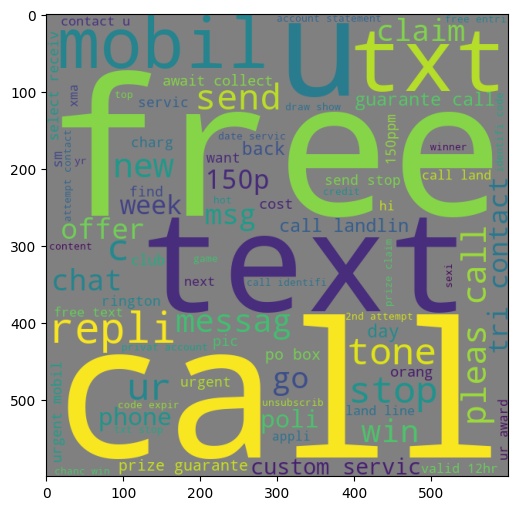

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['Label'] == 0]['Transformed_Message'].str.cat(sep=" "))

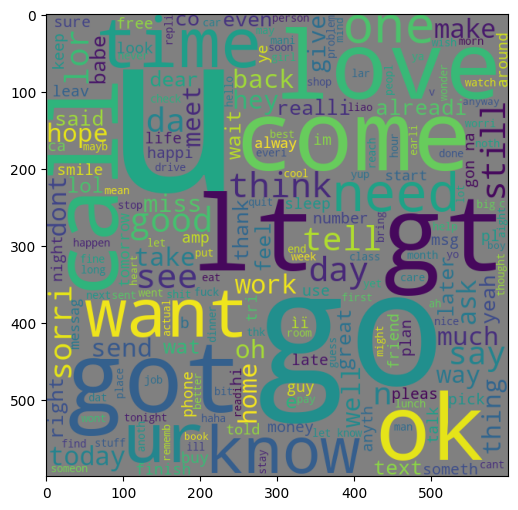

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
ham_corpus = []
for msg in df[df['Label'] == 0]['Transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

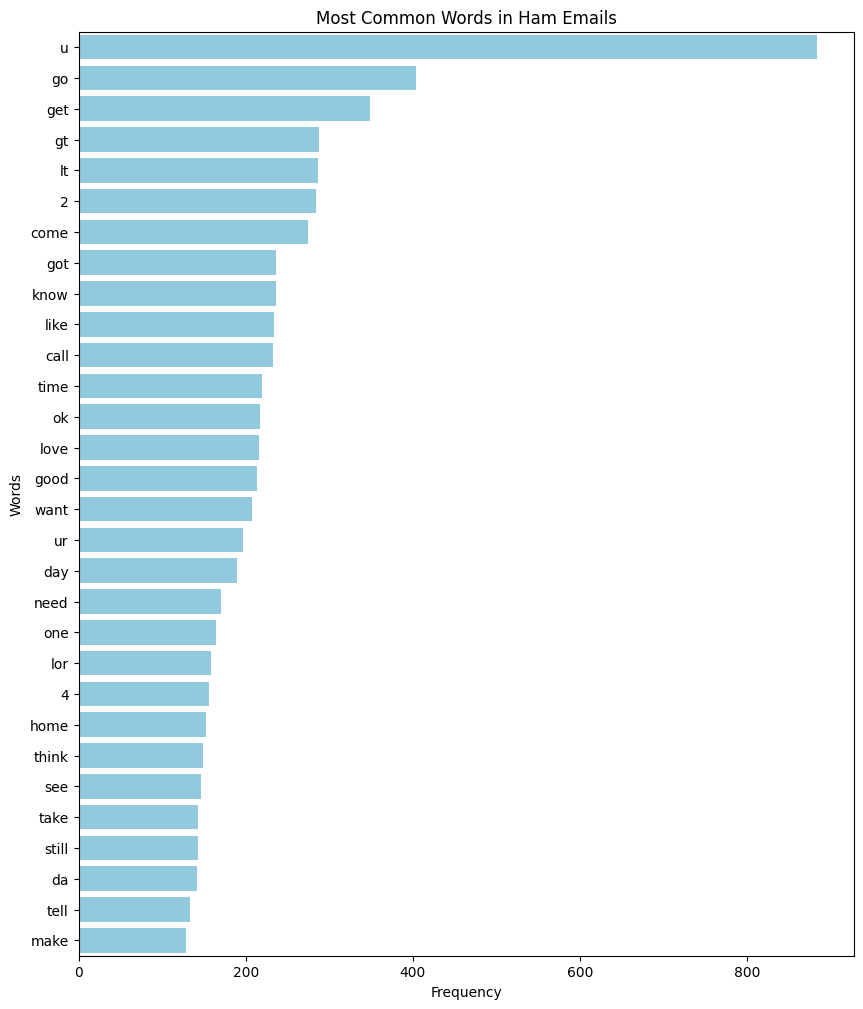

In [54]:
from collections import Counter
# Count the occurrences of each word in 'spam_corpus'
word_counts = Counter(ham_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counts.most_common(30)

# Convert the list of tuples into a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Plot a horizontal bar plot using seaborn
plt.figure(figsize=(10, 12))  # Adjust the figure size for vertical space
sns.barplot(x='Count', y='Word', data=df_most_common, color='skyblue')  # Use x='Count' and y='Word'
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Words in Ham Emails')
plt.show()


In [55]:
spam_corpus = []
for msg in df[df['Label'] == 1]['Transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

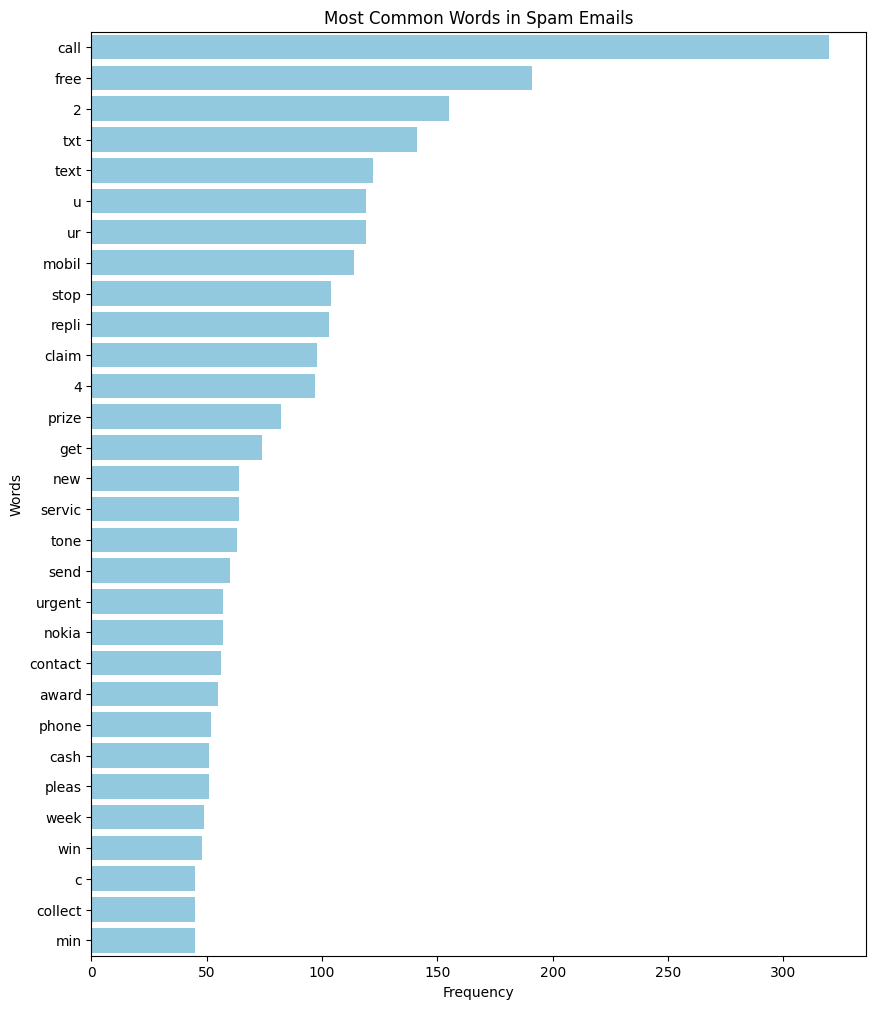

In [56]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each word in 'spam_corpus'
word_counts = Counter(spam_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counts.most_common(30)

# Convert the list of tuples into a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Plot a horizontal bar plot using seaborn
plt.figure(figsize=(10, 12))  # Adjust the figure size for vertical space
sns.barplot(x='Count', y='Word', data=df_most_common, color='skyblue')  # Use x='Count' and y='Word'
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Words in Spam Emails')
plt.show()


# 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['Transformed_Message']).toarray()

In [59]:
X.shape

(5169, 3000)

In [60]:
y = df['Label'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [66]:
clfs = {
    'Support Vector Classifier' : svc, 
    'Naive Bayes': mnb, 
    'Decision Tree': dtc, 
    'Logistic Regression': lrc,
    'Random Forest':rfc,
    'Extra Tree Classifier':etc
}

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support Vector Classifier
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  Naive Bayes
Accuracy -  0.9709864603481625
Precision -  1.0
For  Decision Tree
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  Logistic Regression
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  Random Forest
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  Extra Tree Classifier
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Applying Gaussian Naive bayes\n")
print("The Accuracy Score is:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix is: \n",confusion_matrix(y_test,y_pred1))
print("Precision Score is:",precision_score(y_test,y_pred1))

Applying Gaussian Naive bayes

The Accuracy Score is: 0.8694390715667312
Confusion Matrix is: 
 [[788 108]
 [ 27 111]]
Precision Score is: 0.5068493150684932


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Applying Muntinomial Naive bayes\n")
print("The Accuracy Score is:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix is: \n",confusion_matrix(y_test,y_pred2))
print("Precision Score is:",precision_score(y_test,y_pred2))

Applying Muntinomial Naive bayes

The Accuracy Score is: 0.9709864603481625
Confusion Matrix is: 
 [[896   0]
 [ 30 108]]
Precision Score is: 1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Applying Bernoulli Naive bayes\n")
print("The Accuracy Score is:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix is: \n",confusion_matrix(y_test,y_pred3))
print("Precision Score is:",precision_score(y_test,y_pred3))

Applying Bernoulli Naive bayes

The Accuracy Score is: 0.9835589941972921
Confusion Matrix is: 
 [[895   1]
 [ 16 122]]
Precision Score is: 0.991869918699187


In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
1,Naive Bayes,0.970986,1.000000
4,Random Forest,0.975822,0.982906
0,Support Vector Classifier,0.975822,0.974790
5,Extra Tree Classifier,0.974855,0.974576
3,Logistic Regression,0.958414,0.970297
2,Decision Tree,0.927466,0.811881


In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))